# Meta-Feature evaluation

# Imports

In [1]:
from subpred.transporter_dataset import create_dataset
from subpred.compositions import calculate_paac, calculate_aac
from subpred.eval import (
    get_independent_test_set,
    optimize_hyperparams,
    preprocess_pandas,
    models_quick_compare,
    get_confusion_matrix,
    get_classification_report,
    full_test,
    quick_test,
    nested_loocv
)
from subpred.util import get_feature_score, perform_pca
from subpred.plots import labeled_clustermap, pca_plot_2d, pca_plot_3d
from subpred.pssm import calculate_pssms_notebook

import pandas as pd

# Dataset

In [2]:
df = create_dataset(
    keywords_substrate_filter = ["Amino-acid transport","Sugar transport"],
    keywords_component_filter = ["Transmembrane"],
    keywords_transport_filter = ["Transport"],
    input_file = "../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate = "integrate",
    verbose = True,
    tax_ids_filter = [559292],
    output_log = "../logs/yeast_amino_sugar_dataset.log",
    sequence_clustering=70
)

cd-hit: clustered 64 sequences into 51 clusters at threshold 70


# Feature generation

In [3]:
labels = df.keywords_transport
labels.value_counts()

Amino-acid transport    34
Sugar transport         17
Name: keywords_transport, dtype: int64

In [4]:
df_aac = calculate_aac(df.sequence)
df_paac = calculate_paac(df.sequence)
df_pssm = calculate_pssms_notebook(df.sequence)

In [5]:
df_combined = pd.concat([
    df_aac, df_paac, df_pssm
], axis=1)
df_combined

,A,C,D,E,F,G,H,I,K,L,...,VL_90_3,VK_90_3,VM_90_3,VF_90_3,VP_90_3,VS_90_3,VT_90_3,VW_90_3,VY_90_3,VV_90_3
Uniprot,,,,,,,,,,,,,,,,,,,,,
Q08986,0.085179,0.025554,0.027257,0.047700,0.069847,0.078365,0.010221,0.091993,0.044293,0.090290,...,0.425047,0.345351,0.402277,0.584440,0.282732,0.351044,0.351044,0.605313,0.759013,0.387097
P38967,0.069257,0.023649,0.035473,0.035473,0.069257,0.089527,0.023649,0.103041,0.050676,0.096284,...,0.462547,0.419476,0.458801,0.580524,0.376404,0.419476,0.426966,0.599251,0.709738,0.436330
P38085,0.074313,0.022617,0.035541,0.046850,0.064620,0.069467,0.021002,0.075929,0.048465,0.096931,...,0.441296,0.354251,0.437247,0.714575,0.301619,0.374494,0.392713,0.611336,0.878543,0.425101
P15380,0.078150,0.025518,0.041467,0.035088,0.057416,0.092504,0.019139,0.087719,0.039872,0.087719,...,0.419483,0.339960,0.405567,0.632207,0.300199,0.369781,0.359841,0.606362,0.819085,0.391650
P38206,0.048780,0.012195,0.029617,0.041812,0.095819,0.045296,0.012195,0.099303,0.057491,0.141115,...,0.603916,0.510542,0.590361,0.671687,0.507530,0.554217,0.564759,0.637048,0.774096,0.578313
Q12300,0.074705,0.011796,0.040629,0.039318,0.045872,0.072084,0.017038,0.093054,0.034076,0.077326,...,0.430147,0.345588,0.415441,0.645221,0.338235,0.382353,0.398897,0.562500,0.849265,0.391544
Q12010,0.045455,0.016234,0.045455,0.038961,0.071429,0.055195,0.009740,0.097403,0.029221,0.123377,...,0.424658,0.373288,0.407534,0.578767,0.345890,0.414384,0.404110,0.647260,0.852740,0.424658
Q03697,0.047511,0.011312,0.033937,0.040724,0.072398,0.061086,0.015837,0.083710,0.047511,0.128959,...,0.571429,0.440729,0.550152,0.677812,0.398176,0.483283,0.510638,0.574468,0.817629,0.531915
Q04602,0.049479,0.022135,0.039062,0.040365,0.062500,0.052083,0.019531,0.078125,0.055990,0.121094,...,0.604555,0.559006,0.590062,0.627329,0.542443,0.627329,0.627329,0.552795,0.786749,0.606625


## Plots

First, let's create a plot of the three feature types, and see how they look together in a dataframe:

({'aac': 'cyan', 'paac': 'magenta', 'pssm': 'yellow'},
 <seaborn.matrix.ClusterGrid at 0x7f15083657f0>)

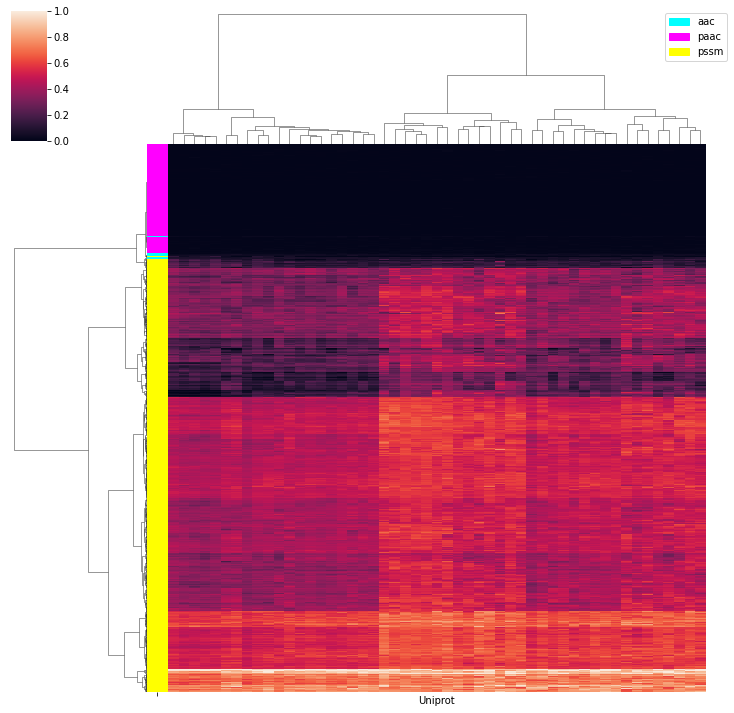

In [6]:
import re

aac = re.compile(r"^[ACDEFGHIKLMNPQRSTVWY]$")
paac = re.compile(r"^[ACDEFGHIKLMNPQRSTVWY][ACDEFGHIKLMNPQRSTVWY]$")
pssm = re.compile(r"^[ACDEFGHIKLMNPQRSTVWY][ACDEFGHIKLMNPQRSTVWY]_\d\d_\d$")

def get_feature_type(feature_name):
    if paac.match(feature_name):
        return "paac"
    elif aac.match(feature_name):
        return "aac"
    elif pssm.match(feature_name):
        return "pssm"
    else:
        raise ValueError("unknown feature type!")

labeled_clustermap(df_combined.T, df_combined.columns.to_series().apply(get_feature_type))

PAAC and AAC values are a lot lower, since they are percentages, while PSSM values are scaled to [0,1]. The scaling was done along the feature axis, to avoid information sharing. What does the data look like when we also scale PAAC and AAC to [0,1]?

({'aac': 'cyan', 'paac': 'magenta', 'pssm': 'yellow'},
 <seaborn.matrix.ClusterGrid at 0x7f14f8b55460>)

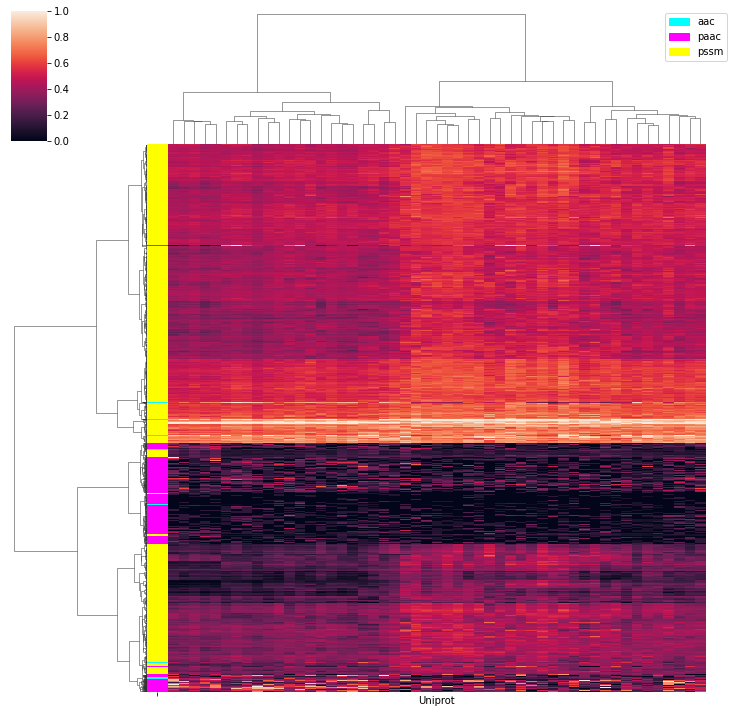

In [7]:
from sklearn.preprocessing import minmax_scale


def min_max_samples(df_feature):
    return pd.DataFrame(
        data=minmax_scale(df_feature, axis=1),
        index=df_feature.index,
        columns=df_feature.columns,
    )


df_combined_minmax = pd.concat(
    [min_max_samples(df_aac), min_max_samples(df_paac), min_max_samples(df_pssm)],
    axis=1,
)
# df_combined_minmax = pd.DataFrame(data=minmax_scale(df_combined, axis=1), index=df_combined.index, columns = df_combined.columns)
labeled_clustermap(
    df_combined_minmax.T, df_combined_minmax.columns.to_series().apply(get_feature_type)
)
# df_combined_minmax#.iloc[0].max()


There is a cluster with almost exclusively PSSM, and one cluster that is more mixed. The latter contains features with lower values.

The feature PCA plot looks similar to the other organisms and also shows the overlap:

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

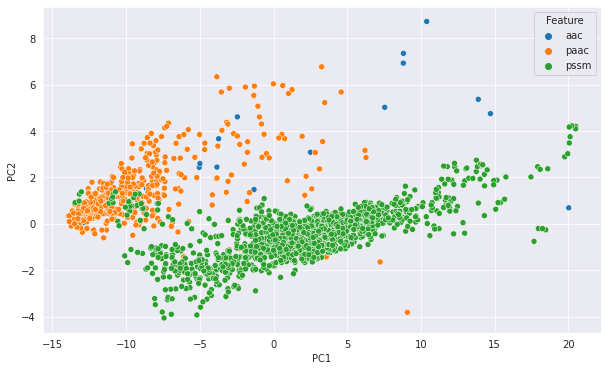

In [8]:
pca_plot_2d(df_combined_minmax.T, df_combined_minmax.T.index.to_series().apply(get_feature_type).rename("Feature"))

What does the data look like when standardizing along the feature axis? In the model, the parameters for this will be derived from the training set and applied to the test set, to avoid data leakage.

({'Amino-acid transport': 'cyan', 'Sugar transport': 'magenta'},
 <seaborn.matrix.ClusterGrid at 0x7f12303ca4c0>)

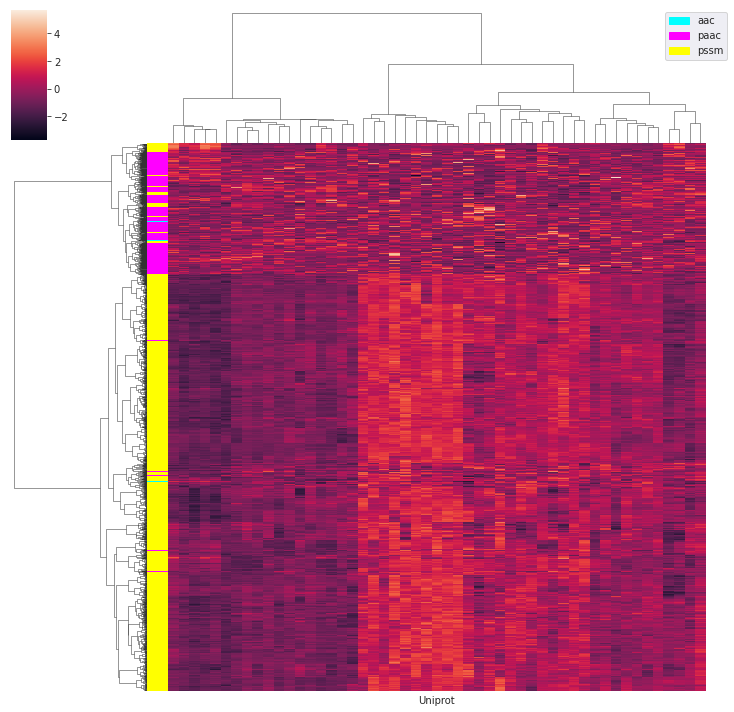

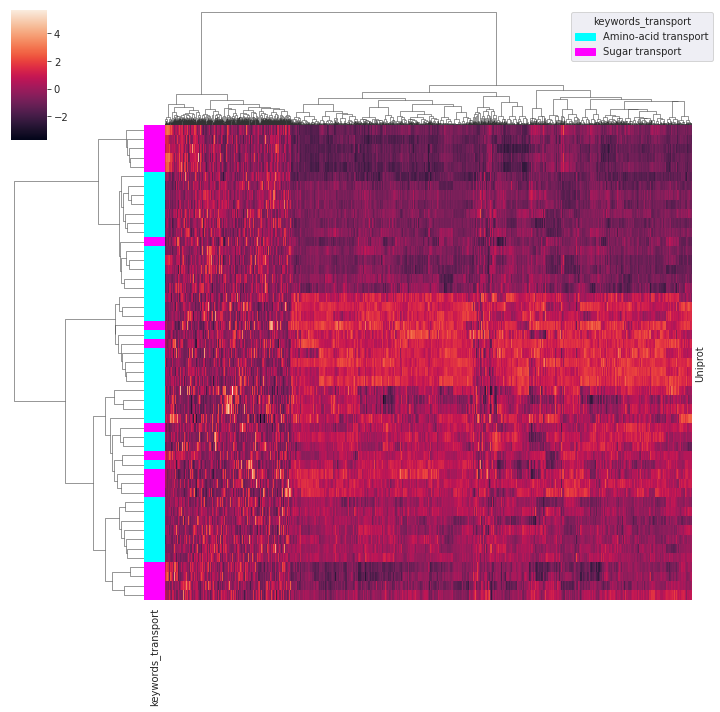

In [9]:
from sklearn.preprocessing import scale

df_combined_std = pd.DataFrame(
    data=scale(df_combined), index=df_combined.index, columns=df_combined.columns
)
labeled_clustermap(
    df_combined_std.T, df_combined.columns.to_series().apply(get_feature_type)
)
labeled_clustermap(
    df_combined_std, df.keywords_transport
)

The composition data looks a bit noisier, however this could also be caused by the fact that more PSSM features exist, and therefore have a higher impact on the h-clustering algorithm. The second plot shows that the two sample clusters do not correspond to the classes. 

There are two clusters, one for PSSM and one for the compositions. There are sub-clusters taht correspond to the substrates

The PCA plot of the standardized features also looks similar. There is a separation between most PSSM features and the rest of the dataset, possibly because of their lower variance

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

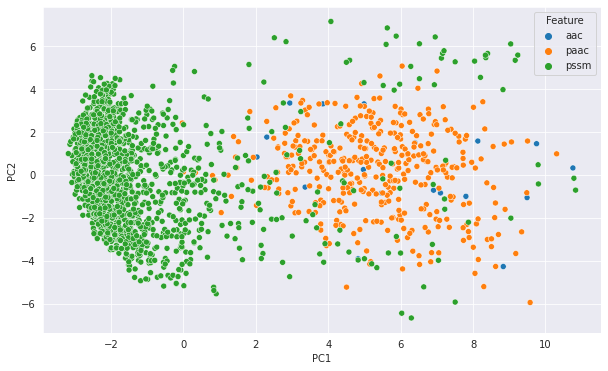

In [10]:
pca_plot_2d(df_combined_std.T, df_combined_std.T.index.to_series().apply(get_feature_type).rename("Feature"))

## Independent test set

In [11]:
X, y, feature_names, sample_names = preprocess_pandas(
    df_combined, labels, return_names=True
)
(
    X_train,
    X_test,
    y_train,
    y_test,
    sample_names_train,
    sample_names_test,
) = get_independent_test_set(X, y, sample_names=sample_names, test_size=0.2)

## Model comparison

In [12]:
models_quick_compare(X_train, y_train)

,0,1,2,3,4,mean,std
est,,,,,,,
GaussianNB(),0.667,0.795,0.855,0.619,0.385,0.664,0.183
KNeighborsClassifier(),1.000,0.564,0.855,0.385,0.667,0.694,0.241
"LinearSVC(class_weight='balanced', max_iter=1000000.0, random_state=0)",0.855,0.855,0.873,0.667,0.619,0.774,0.121
"LinearSVC(max_iter=1000000.0, random_state=0)",0.855,0.855,0.873,0.667,0.619,0.774,0.121
"RandomForestClassifier(class_weight='balanced', random_state=0)",0.855,0.795,0.667,0.385,0.667,0.673,0.181
RandomForestClassifier(random_state=0),0.855,1.000,0.855,0.385,0.667,0.752,0.237
SGDClassifier(random_state=0),0.855,0.733,0.873,0.667,0.855,0.796,0.091
"SVC(class_weight='balanced', random_state=0)",1.000,1.000,0.855,0.385,0.855,0.819,0.253
SVC(random_state=0),1.000,1.000,0.667,0.385,0.667,0.744,0.261


This time, the RBF SVM has the best average results, but there is one fold with very bad performance. What does this subset look like?

In [13]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(5)

fold_four_test = list(skfold.split(X_train, y_train))[3][1]
fold_four_train = list(skfold.split(X_train, y_train))[3][0]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

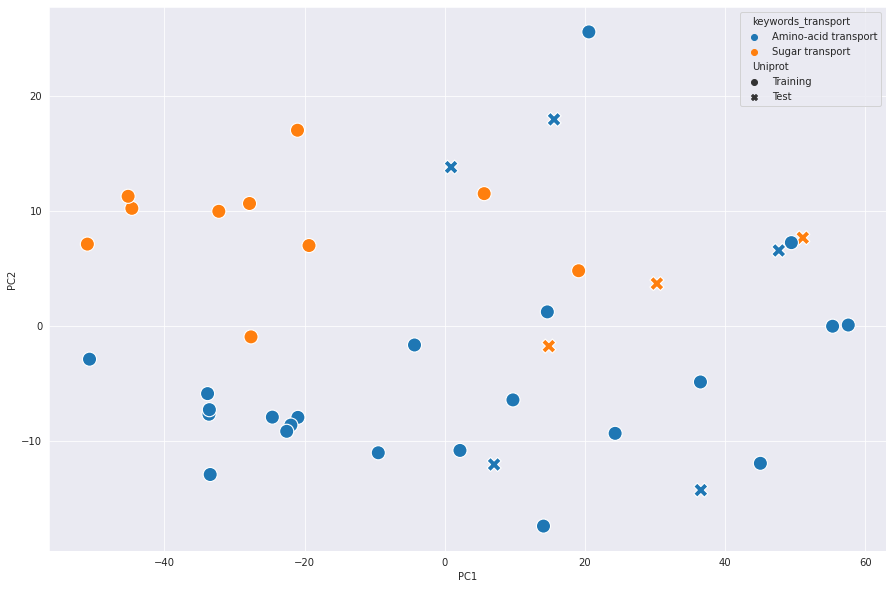

In [14]:
pca_plot_2d(
    df_combined.loc[sample_names_train],
    labels.loc[sample_names_train],
    df.loc[sample_names_train]
    .index.to_series()
    .transform(
        lambda x: "Test" if x in sample_names_train[fold_four_test] else "Training"
    ),
    figsize=(15, 10),
    marker_size=200,
)


Nothing that stands out at a first glance, although the three sugar transporters in the test set are cluster to the AA transporters. Not much can be said from this 2D model, as the actual model was trained on all feature dimensions.


Lets confirm that we have the correct proteins:

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

pipeline = make_pipeline(StandardScaler(), SVC(random_state=0, class_weight="balanced"))
# TODO too many proteins!
pipeline.fit(X_train[fold_four_train], y_train[fold_four_train])
print(confusion_matrix(y_pred=pipeline.predict(X_train[fold_four_test]), y_true=y_train[fold_four_test]))
print(
    f1_score(
        y_pred=pipeline.predict(X_train[fold_four_test]),
        y_true=y_train[fold_four_test],
        average="macro",
    )
)

[[5 0]
 [3 0]]
0.38461538461538464


Yes, those are the correct proteins. The problem during this fold seems to be that 3 of 3 sugar proteins are classified as amino acid. Which sugar transporters are those?

In [16]:
df.loc[sample_names_train[fold_four_test]].query("keywords_transport == 'Sugar transport'")

,keywords_transport,keywords_location,keywords_transport_related,gene_names,protein_names,tcdb_id,tcdb_class,organism_id,sequence
Uniprot,,,,,,,,,
P38206,Sugar transport,Endoplasmic reticulum;Membrane;Transmembrane,Transport,RFT1 YBL020W YBL0442,Oligosaccharide translocation protein RFT1 (Re...,2.A.66.3.1,2.A,559292,MAKKNSQLPSTSEQILERSTTGATFLMMGQLFTKLVTFILNNLLIR...
Q03697,Sugar transport,Membrane;Transmembrane,Transport,YMD8 YML038C,Putative nucleotide-sugar transporter YMD8,2.A.7.9.14,2.A,559292,MNRTVFLAFVFGWYFCSIALSIYNRWMFDPKDGLGIGYPVLVTTFH...
P42833,Sugar transport,Membrane;Transmembrane,Transport,HXT14 HXT9 YNL318C N0345,Hexose transporter HXT14,2.A.1.1.109,2.A,559292,MTAQIPYQHSSGYISHFHNNELDAGRGRDYNVTIKYLDDKEENIEG...


An Oligosaccharide transporter, a nucleotide-sugar transporter and a hexose transporter from the HXT family, which showed some differences in terms of sequence PCA. In other words, three distinct types of sugar transporters. What was the SVM trained on?

In [17]:
df.loc[sample_names_train[fold_four_train]].query("keywords_transport == 'Sugar transport'")

,keywords_transport,keywords_location,keywords_transport_related,gene_names,protein_names,tcdb_id,tcdb_class,organism_id,sequence
Uniprot,,,,,,,,,
P32467,Sugar transport,Cell membrane;Membrane;Transmembrane,Transport,HXT4 LGT1 RAG1 YHR092C,Low-affinity glucose transporter HXT4 (Low-aff...,2.A.1.1.30,2.A,559292,MSEEAAYQEDTAVQNTPADALSPVESDSNSALSTPSNKAERDDMKD...
P10870,Sugar transport,Cell membrane;Membrane;Transmembrane,Transport,SNF3 YDL194W D1234,Low glucose sensor SNF3 (High-affinity glucose...,2.A.1.1.17,2.A,559292,MDPNSNSSSETLRQEKQGFLDKALQRVKGIALRRNNSNKDHTTDDT...
P40886,Sugar transport,Membrane;Transmembrane,Transport,HXT8 YJL214W HRA569 J0232,Hexose transporter HXT8,NaN,0.0,559292,MTDRKTNLPEEPIFEEAEDDGCPSIENSSHLSVPTVEENKDFSEYN...
Q12300,Sugar transport,Cell membrane;Membrane;Transmembrane,Transport,RGT2 YDL138W D2160,High glucose sensor RGT2 (Low-affinity glucose...,2.A.1.1.19,2.A,559292,MNDSQNCLRQREENSHLNPGNDFGHHQGAECTINHNNMPHRNAYTE...
P53048,Sugar transport,Cell membrane;Membrane;Transmembrane,Symport;Transport,MAL11 AGT1 MAL1T MTP1 YGR289C,General alpha-glucoside permease (Maltose perm...,2.A.1.1.11,2.A,559292,MKNIISLVSKKKAASKNEDKNISESSRDIVNQQEVFNTEDFEEGKK...
P39932,Sugar transport,Membrane;Transmembrane,Transport,STL1 YDR536W D9719.39,Sugar transporter STL1,2.A.1.1.38,2.A,559292,MKDLKLSNFKGKFISRTSHWGLTGKKLRYFITIASMTGFSLFGYDQ...
P43581,Sugar transport,Membrane;Transmembrane,Transport,HXT10 YFL011W,Hexose transporter HXT10,2.A.1.1.5,2.A,559292,MVSSSVSILGTSAKASTSLSRKDEIKLTPETREASLDIPYKPIIAY...
P54854,Sugar transport,Membrane;Transmembrane,Transport,HXT15 YDL245C,Hexose transporter HXT15,2.A.1.1.107,2.A,559292,MASEQSSPEINADNLNSSAADVHVQPPGEKEWSDGFYDKEVINGNT...
P38156,Sugar transport,Membrane;Transmembrane,Transport,MAL31 MAL3T YBR298C YBR2116,Maltose permease MAL31 (Maltose transport prot...,NaN,0.0,559292,MKGLSSLINRKKDRNDSHLDEIENGVNATEFNSIEMEEQGKKSDFD...


Almost exclusively Pentose and Hexose transporters, with two maltose transporters and an Myo-Inositol transporter, which is another type of hexose. That, and the small sample count of 3 in the test set, could explain these results. In theory, it would probably be better to put these different types of sugar transporters into their own classes, but then we might not have enough samples left. Let's try it anyway:  

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

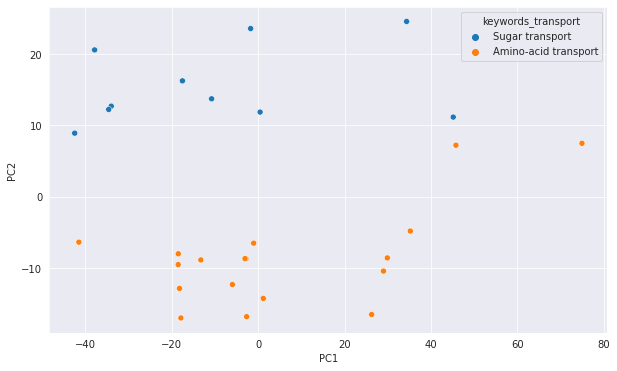

In [18]:
sugar_filtered = df.index[
    df.protein_names.str.match("(?i).*(hexose|hxt|glucose|maltose).*")
].to_list()

# amino_all = df[df.keywords_transport.str.startswith("Amino")].index.to_list()
amino_permease = df.index[
    df.protein_names.str.match("(?i).*(permease|cysteine).*")
    & df.keywords_transport.str.contains("Amino")
].to_list()

df_filtered = df.loc[sugar_filtered + amino_permease]

pca_plot_2d(
    calculate_pssms_notebook(df_filtered.sequence), df_filtered.keywords_transport
)


This dataset would probably give us a very good score for a linear SVM with PCA. A model with more dimensions could also classify the single sugar transporter on the right correctly.

For this dataset, we only selected transporters that carry essential amino acids or hexose/maltose.

## Feature importance

How many top 50 features come from each feature type?

In [19]:
top50 = get_feature_score(df_combined, labels, remove_zero_variance=True).sort_values(
    "Normalized score", ascending=False
).head(50)
top50.Feature.apply(get_feature_type).value_counts()

pssm    43
paac     6
aac      1
Name: Feature, dtype: int64

Like in A thaliana, we get a mix again. For human and e coli, the top50 only came from PSSM.

In [20]:
top50[top50.Feature.apply(get_feature_type) == "pssm"].head(10)

,Feature,Normalized score,Measure
743,TD_50_1,0.006570,Feature importance (f_classif)
1143,TD_50_3,0.005990,Feature importance (f_classif)
606,IE_50_1,0.005862,Feature importance (f_classif)
1002,IN_50_3,0.005300,Feature importance (f_classif)
1805,IQ_90_3,0.004830,Feature importance (f_classif)
747,TG_50_1,0.004721,Feature importance (f_classif)
969,GI_50_3,0.004339,Feature importance (f_classif)
754,TP_50_1,0.004272,Feature importance (f_classif)
748,TH_50_1,0.004188,Feature importance (f_classif)
1811,IK_90_3,0.004159,Feature importance (f_classif)


Threonine seems to be an important factor for distinguishing sugar transporters from amino acid transporters, preferrably in combination with Aspartic Acid (D), Glycine, and Proline. 

Even more of the most important PSSM exchange rates contain Isoleucine, in combination with Glutamic acid, Asparagine and Glutamine. 

In [21]:
top50[top50.Feature.apply(get_feature_type) == "pssm"].Feature.apply(lambda x: [x[0], x[1]]).explode().value_counts()

I    18
T    17
D     9
P     7
E     6
G     6
N     4
M     4
Q     3
K     3
H     2
R     2
A     2
W     1
Y     1
S     1
Name: Feature, dtype: int64

## Parameter tuning

#### Custom transformer


Whole dataset, linear svm

In [22]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="linear",
    dim_reduction=None,
    C=[0.01, 0.1, 1, 10],
)


{'linearsvc__C': 0.01, 'linearsvc__class_weight': 'balanced', 'linearsvc__dual': True, 'linearsvc__max_iter': 100000000.0}
0.774


The model wants a relatively low value of C, i.e. it wants a large decision margin. This is also the case for the pssm-selector, but with a slightly higher score:

In [23]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="linear",
    dim_reduction=None,
    C=[0.01, 0.1, 1, 10],
    feature_transformer="pssm",
    feature_names=feature_names,
)
best_estimator_lsvc = gsearch


{'linearsvc__C': 0.01, 'linearsvc__class_weight': 'balanced', 'linearsvc__dual': True, 'linearsvc__max_iter': 100000000.0, 'pssmselector__iterations': 1, 'pssmselector__uniref_threshold': 'all'}
0.85


The RBF kernel delivers a better score without the pssmselector, but with default parameters:

In [24]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction=None,
    C=[0.1, 1, 10],
)

{'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.819


In [25]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction=None,
    C=[0.1, 1, 10, 100],
    feature_transformer="pssm",
    feature_names=feature_names,
)

{'pssmselector__iterations': 1, 'pssmselector__uniref_threshold': 50, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.819


The selector does not change the score

## Dimensionality reduction

Trying only in steps of 20, to reduce runtime.

In [26]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction="kbest",
    C=[1, 10, 100],
    select_k_steps=20,
    remove_zero_var=True,
)

{'selectkbest__k': 181, 'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 0.01}
0.819


Feature selection does not improve the rbf kernel, while PCA delivers the best score so far:

In [27]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction="pca",
    # feature_transformer="pssm",
    # feature_names=feature_names,
    # C=[0.1, 0.01, 0.001],
    # gamma=[0.1, 0.01, 0.001],
)


{'pca__n_components': 0.95, 'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}
0.875


Does using the pssm selector change anything?

In [28]:
gsearch = optimize_hyperparams(
    X_train,
    y_train,
    kernel="rbf",
    dim_reduction="pca",
    feature_transformer="pssm",
    feature_names=feature_names,
    # C=[0.1, 0.01, 0.001],
    # gamma=[0.1, 0.01, 0.001],
)

best_estimator_svc_pca = gsearch

{'pca__n_components': 0.94, 'pssmselector__iterations': 1, 'pssmselector__uniref_threshold': 50, 'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__gamma': 0.1}
0.913


The RBF+PCA model with the pssmselector gives the best model.

## Validation

As with the PAAC and PSSM features, we have the problem that the test set contains the only three nucleotide-sugar transporters in the dataset, and they get classified as AA transporters for the training set. Next, we will look at other train-test splits, and try evaluating a model that does not contain these transporters.

### No feature selection, linear kernel

This has worked well for the PSSM feature, maybe also here?

In [29]:
get_confusion_matrix(X_test, y_test, best_estimator_lsvc, labels=labels)

predicted,Amino-acid transport,Sugar transport
observed,,
Amino-acid transport,7,0
Sugar transport,3,1


In [30]:
get_classification_report(X_test, y_test, best_estimator_lsvc, labels=labels)

,precision,recall,f1-score,support
Amino-acid transport,0.700,1.000,0.824,7
Sugar transport,1.000,0.250,0.400,4
macro avg,0.850,0.625,0.612,11
weighted avg,0.809,0.727,0.670,11


No, the score is the same as the RBF model below.

### RBF, PCA

More overfitting, this model is too complex for the dataset

In [31]:
get_confusion_matrix(X_test, y_test, best_estimator_svc_pca, labels=labels)

predicted,Amino-acid transport,Sugar transport
observed,,
Amino-acid transport,7,0
Sugar transport,3,1


In [32]:
get_classification_report(X_test, y_test, best_estimator_svc_pca, labels=labels)

,precision,recall,f1-score,support
Amino-acid transport,0.700,1.000,0.824,7
Sugar transport,1.000,0.250,0.400,4
macro avg,0.850,0.625,0.612,11
weighted avg,0.809,0.727,0.670,11


## Alternative evaluation with nested LOOCV

In [33]:
nested_loocv(df_features=df_combined, labels=labels, dim_reduction=None, kernel="rbf", feature_transformer="pssm")

,train,test
F1 (macro),0.862,0.794


In [34]:
nested_loocv(df_features=df_combined, labels=labels, dim_reduction="pca", kernel="rbf", feature_transformer="pssm")


,train,test
F1 (macro),0.929,0.754


## Estimating validation variance

How much did the result depend on choosing the training and test sets?

Mean and standard deviation for randomly selected training and validation sets.

In [35]:
df_scores, df_params = full_test(
    df_combined,
    labels,
    dim_reduction="pca",
    kernel="rbf",
    repetitions=10,
    feature_transformer="pssm",
)
df_scores_gr = df_scores.groupby(["label", "dataset"], as_index=False)
print("Mean F1")
display(df_scores_gr.mean().pivot(index="label", columns="dataset", values="F1 score"))
print("Sdev F1")
display(df_scores_gr.std().pivot(index="label", columns="dataset", values="F1 score"))
print("Parameters")
display(df_params)

Mean F1


dataset,test,train
label,,
Amino-acid transport,0.8691,0.9514
Sugar transport,0.6844,0.8873


Sdev F1


dataset,test,train
label,,
Amino-acid transport,0.069518,0.018846
Sugar transport,0.192039,0.046717


Parameters


,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.88,0.87,0.95,0.9,0.82,0.91,0.81,0.82,0.86,0.97
pssmselector__iterations,1,1,all,3,1,1,1,1,3,3
pssmselector__uniref_threshold,90,all,50,50,90,90,90,50,50,50
svc__C,10,1,10,1,1,1,1,10,1,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__gamma,scale,0.01,scale,scale,0.01,0.1,0.1,0.01,scale,scale


As with the other features, the problem lies with the relatively diverse set of transporters. What if we limit the dataset to only hexoses/maltose, and only amino-acid permeases that transport essential AAs? 

In [36]:
df_combined_filtered = pd.concat(
    [
        calculate_aac(df_filtered.sequence),
        calculate_paac(df_filtered.sequence),
        calculate_pssms_notebook(df_filtered.sequence),
    ],
    axis=1,
)

df_scores, df_params = full_test(
    df_combined_filtered,
    df_filtered.keywords_transport,
    dim_reduction="pca",
    kernel="rbf",
    repetitions=10,
    feature_transformer="pssm",
)
df_scores_gr = df_scores.groupby(["label", "dataset"], as_index=False)
print("Mean F1")
display(df_scores_gr.mean().pivot(index="label", columns="dataset", values="F1 score"))
print("Sdev F1")
display(df_scores_gr.std().pivot(index="label", columns="dataset", values="F1 score"))
print("Parameters")
display(df_params)

Mean F1


dataset,test,train
label,,
Amino-acid transport,1.0,0.9963
Sugar transport,1.0,0.9941


Sdev F1


dataset,test,train
label,,
Amino-acid transport,0.0,0.011700
Sugar transport,0.0,0.018657


Parameters


,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.8,0.8,0.8,0.86,0.8,0.83,0.8,0.8,0.8,0.8
pssmselector__iterations,3,1,3,1,1,3,1,3,1,3
pssmselector__uniref_threshold,50,90,90,90,all,90,all,50,90,90
svc__C,10,10,1,10,10,1,10,1,10,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None
svc__gamma,0.01,0.1,scale,scale,0.01,scale,0.01,scale,0.01,scale


Cleaning up the dataset leads to perfect scores! On the other hand, this model can only classify essential amino acids and hexoses/maltoses, not all substrates that are classified as "amino" or "sugar" in Uniprot.